In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [39]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [41]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [42]:
categorical = df.select_dtypes(include=["object","category"]).columns
numerical = df.select_dtypes(include=["int64","float64"]).columns
print(f"Categorical: {categorical}")
print(f"Numerical: {numerical}")

Categorical: Index(['sex', 'smoker', 'day', 'time'], dtype='object')
Numerical: Index(['total_bill', 'tip', 'size'], dtype='object')


array([[<Axes: title={'center': 'total_bill'}>,
        <Axes: title={'center': 'tip'}>],
       [<Axes: title={'center': 'size'}>, <Axes: >]], dtype=object)

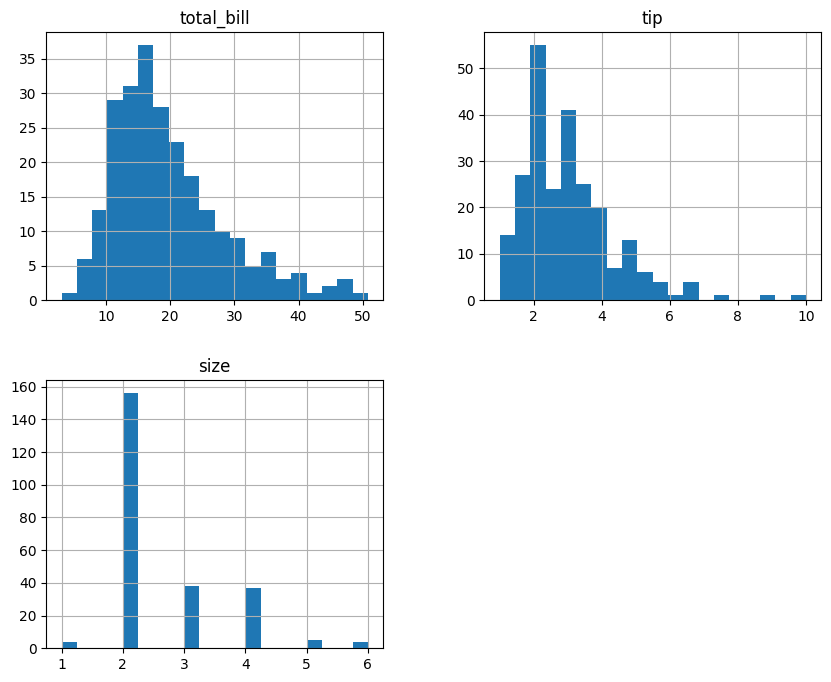

In [43]:
df[numerical].hist(figsize=(10,8),bins=20)

sex
Male      157
Female     87
Name: count, dtype: int64
smoker
No     151
Yes     93
Name: count, dtype: int64
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
time
Dinner    176
Lunch      68
Name: count, dtype: int64


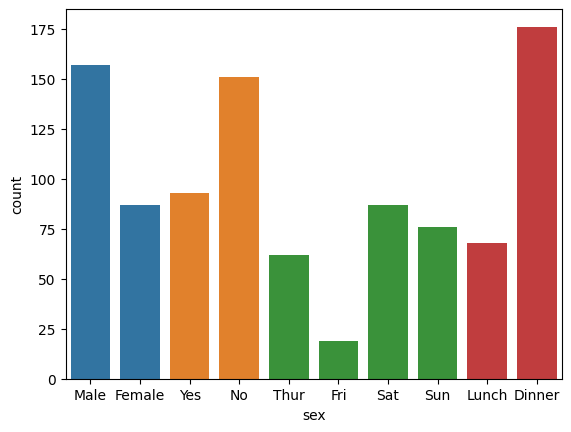

In [44]:
for col in categorical:
  print(df[col].value_counts())
  sns.countplot(x=col,data=df)

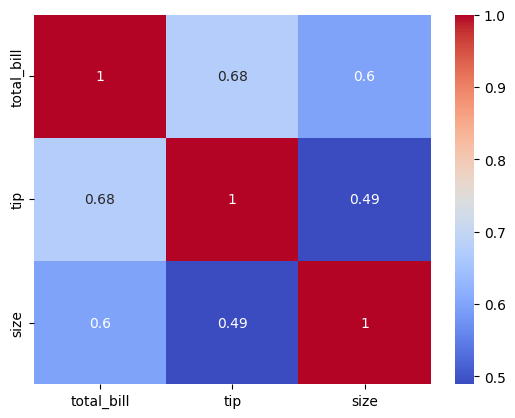

In [45]:
sns.heatmap(df[numerical].corr(),annot=True,cmap="coolwarm")
plt.show()

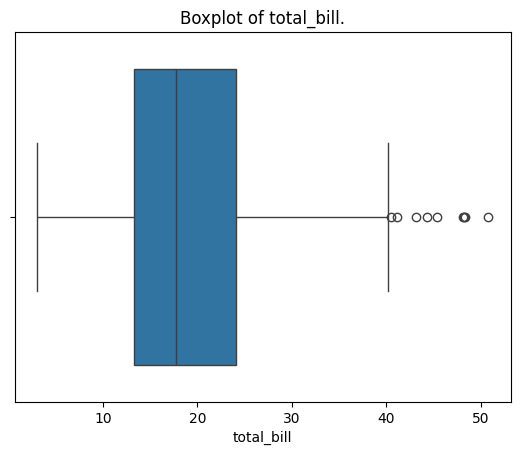

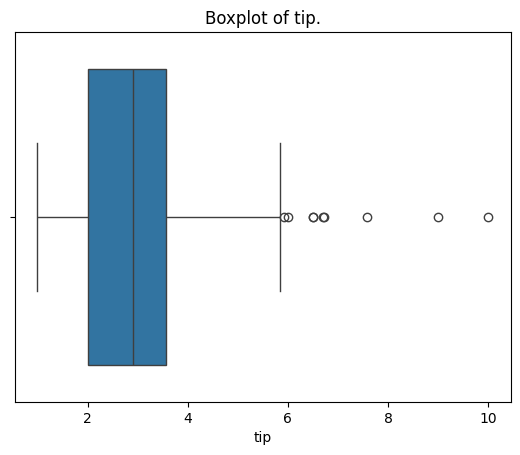

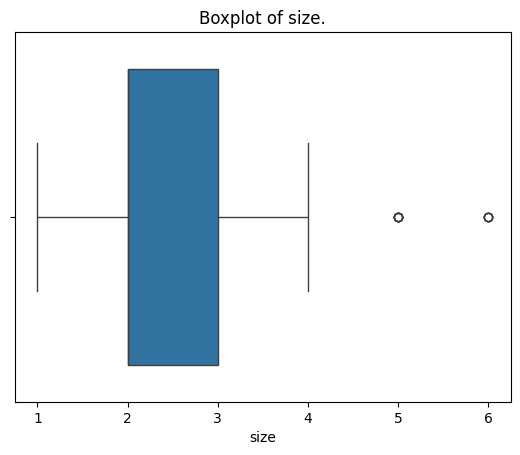

In [46]:
for col in numerical:
  sns.boxplot(x=df[col])
  plt.title(f"Boxplot of {col}.")
  plt.show()

In [47]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [48]:
df.duplicated().sum()

np.int64(1)

In [49]:
df = df.drop_duplicates()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  243 non-null    float64 
 1   tip         243 non-null    float64 
 2   sex         243 non-null    category
 3   smoker      243 non-null    category
 4   day         243 non-null    category
 5   time        243 non-null    category
 6   size        243 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 9.1 KB


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  243 non-null    float64 
 1   tip         243 non-null    float64 
 2   sex         243 non-null    category
 3   smoker      243 non-null    category
 4   day         243 non-null    category
 5   time        243 non-null    category
 6   size        243 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 9.1 KB


In [52]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# ***Encoding***

In [62]:
unique_value = {}
for col in categorical:
  print(df[col].unique())
  value = df[col].nunique()
  unique_value[col] = value
  print(unique_value)

['Female', 'Male']
Categories (2, object): ['Male', 'Female']
{'sex': 2}
['No', 'Yes']
Categories (2, object): ['Yes', 'No']
{'sex': 2, 'smoker': 2}
['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']
{'sex': 2, 'smoker': 2, 'day': 4}
['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']
{'sex': 2, 'smoker': 2, 'day': 4, 'time': 2}


In [68]:
label_en = []
hot_en = []

for key,value in unique_value.items():
  if value == 2:
    label_en.append(key)
  else:
    hot_en.append(key)
print(f"Label -> {label_en}")
print(f"Hot -> {hot_en}")



Label -> ['sex', 'smoker', 'time']
Hot -> ['day']


In [69]:
le = LabelEncoder()

In [73]:
for col in label_en:
  df[col] = le.fit_transform(df[col])

In [74]:
for col in hot_en:
  df = pd.get_dummies(df,columns=[col])

In [75]:
df.head()

,total_bill,tip,sex,smoker,time,size,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,0,0,0,2,False,False,False,True
1,10.34,1.66,1,0,0,3,False,False,False,True
2,21.01,3.50,1,0,0,3,False,False,False,True
3,23.68,3.31,1,0,0,2,False,False,False,True
4,24.59,3.61,0,0,0,4,False,False,False,True
